In [440]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

housing = fetch_openml(name="house_prices", as_frame=True)
sale_price = housing.target
data = housing.data
data['sale_price'] = sale_price

/Users/zoria/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Завдання 1. 

Порахуйте основні статистики для SalePrice, які допоможуть вам зрозуміти характер даних не малюючи їх. Опишіть результати:

a. Яка середня ціна?

b. Наскільки різноманітні ціни?

c. Якщо у мене бюджет 150 тисяч доларів, який відсоток будинків я можу собі
дозволити?

d. Чи є в даних викиди?

e. Інші ваші ідеї та спостереження...

Намалюйте оптимальну гістограму для SalePrice. Чи ваші спостереження з статистик можна також побачити на гістограмі? Опишіть результати.

In [441]:
data[["sale_price"]].describe()

,sale_price
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [442]:
example_data = data["sale_price"]

print("Mean:", np.mean(example_data))
print("Median:", np.median(example_data))
print("Mode:", st.mode(example_data)[0])
print("1%-quantile:", np.percentile(example_data, 1))
print("99%-quantile:", np.percentile(example_data, 99))
print("Variance:", np.var(example_data))
print("Standard deviation(sqrt):", np.sqrt(np.var(example_data)))
print("Standard deviation:", np.std(example_data))
print("Skewness:", st.skew(example_data))
print("Kurtosis:", st.kurtosis(example_data))

Mean: 180921.19589041095
Median: 163000.0
Mode: [140000]
1%-quantile: 61815.97
99%-quantile: 442567.01000000053
Variance: 6306788585.349301
Standard deviation(sqrt): 79415.29188606751
Standard deviation: 79415.29188606751
Skewness: 1.880940746034036
Kurtosis: 6.509812011089439


/var/folders/15/ks9q9zp55y99s4lt86203cn00000gn/T/ipykernel_55546/861964266.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print("Mode:", st.mode(example_data)[0])


Середня ціна будинку становить 180921 доларів, медіана 163000 доларів.

Стандартне відхилення 79442 доларів, тобто вилка середньої ціни буде між 101479 та 260363 доларів. 

Мінімальна ціна становить 34900 доларів, а максмальна 755000 доларів.

75% будинків можна купити за ціною до 214000 доларів. 25% будинків коштують більше ніж 214000 доларів. 

Ціна на 50% усіх будинків знаходиться в діапазоні між 129975 та 214000 доларів.

Ціна на 98% усіх будинків в межах до 442567 доларів. В той час, коли максимальна ціна становить 755000 доларів. Тому, можна зробити висновок, що наша гістограма буде мати тяжкий правий хвіст.

Skewness додатній, відповідно маємо тяжкий правий хвіст. Куртозис більше 6, що знову ж таки підтвердує тяжкі хвости.

In [443]:
data[data['sale_price'] <= 150000].shape[0] / data.shape[0] * 100

42.397260273972606

Маючи бюджет 150000 доларів, я собі зможу дозволити купити 42% будинків.

180921.19589041095 3015.3532648401824
163000.0 2716.6666666666665


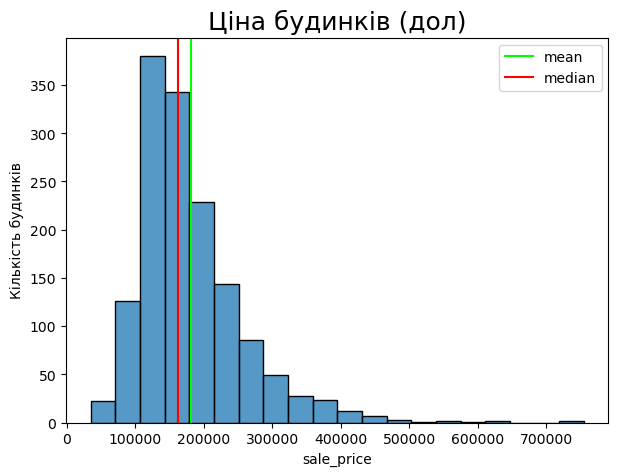

In [444]:
f,ax = plt.subplots(1,1, figsize = (7,5))

sns.histplot(data["sale_price"],ax = ax, bins = 20)
ax.set_ylabel("Кількість будинків")
ax.axvline(data["sale_price"].mean(), label = "mean", color = "lime")
print(data["sale_price"].mean(), data["sale_price"].mean()/60)
ax.axvline(data["sale_price"].median(), label = "median", color = "r")
print(data["sale_price"].median(), data["sale_price"].median()/60)
ax.set_title("Ціна будинків (дол)", fontsize = 18)

plt.legend()
plt.show()

Наша гістограма не зовсім симетрична, так як ліва частина має гостру вершину, а права частина більш видовжена. Також, у даних є викиди праворуч. Бачимо, що середнє та медіана не сильно відрізняються. Гістограма підтверджує, що більшість будинків у ціновій категорії між 100000 та 215000 доларів. 98% будинків будуть коштувати менше ніж 500000 доларів.

# Завдання 2

Дослідимо, які неперервні показники корелюють з SalePrice. Виберіть 3-5 інших колонок, які на вашу думку мають впливати на SalePrice і проаналізуйте зв’язок (можете обрати будь-який доречний спосіб для цього аналізу). Виберіть одну колонку, яка відповідно до вашого аналізу найбільше корелює з SalePrice і порахуйте три види коефіцієнтів кореляції: Спірмана, Кендала та Пірсона. Опишіть результати: Чи є різниця між показниками? Чому?

In [446]:
pd.set_option('display.max_rows', 100) 
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Проаналізуємо кореляцію між ціною та площею території

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


            sale_price   LotArea
sale_price    1.000000  0.263843
LotArea       0.263843  1.000000
            sale_price   LotArea
sale_price    1.000000  0.456461
LotArea       0.456461  1.000000


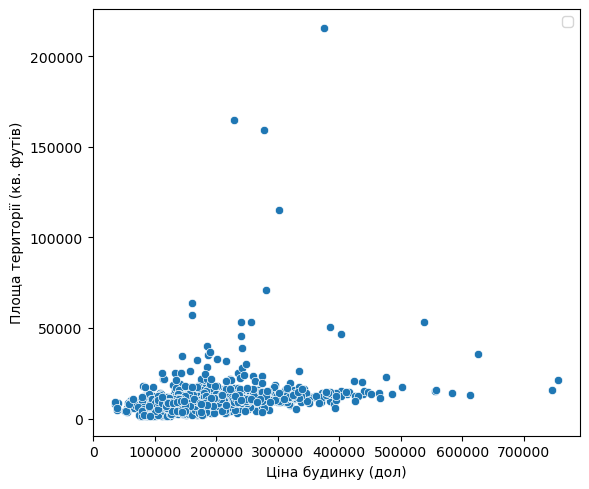

In [447]:
plt.figure(figsize = (6,5))

b1, b0 = np.polyfit(data["sale_price"], data["LotArea"], deg = 1)
print(data[["sale_price", 'LotArea']].corr())
print(data[["sale_price", 'LotArea']].corr(method = "spearman"))
sns.scatterplot(x = data["sale_price"], y = data["LotArea"])

plt.tight_layout()
plt.legend()
plt.ylabel("Площа території (кв. футів)")
plt.xlabel("Ціна будинку (дол)")
plt.show()

Діагарма розпаду виглядає не достатньо інформативною, тому я вирішила обмежити наші дані. А саме, проаналізувати корелацію Ціни на будинки та Площу території до 50000 кв. футів.

In [448]:
data[data['LotArea'] <= 50000].shape[0]

1449

In [449]:
clean_data = data[data['LotArea'] <= 50000]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


            sale_price   LotArea
sale_price    1.000000  0.378505
LotArea       0.378505  1.000000
            sale_price   LotArea
sale_price    1.000000  0.449189
LotArea       0.449189  1.000000


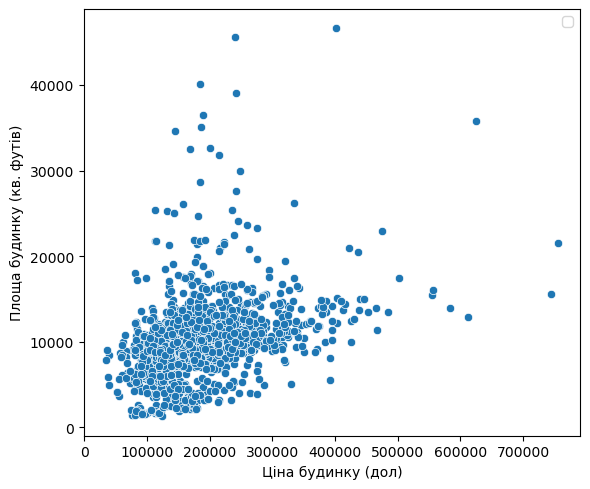

In [450]:
plt.figure(figsize = (6,5))

b1, b0 = np.polyfit(clean_data["sale_price"], clean_data["LotArea"], deg = 1)
print(clean_data[["sale_price", 'LotArea']].corr())
print(clean_data[["sale_price", 'LotArea']].corr(method = "spearman"))
sns.scatterplot(x = clean_data["sale_price"], y = clean_data["LotArea"])

plt.tight_layout()
plt.legend()
plt.ylabel("Площа будинку (кв. футів)")
plt.xlabel("Ціна будинку (дол)")
plt.show()

Проаналізуємо кореляцію між ціною та площею гаражу

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


            sale_price  GarageArea
sale_price    1.000000    0.628286
GarageArea    0.628286    1.000000
            sale_price  GarageArea
sale_price     1.00000     0.64965
GarageArea     0.64965     1.00000


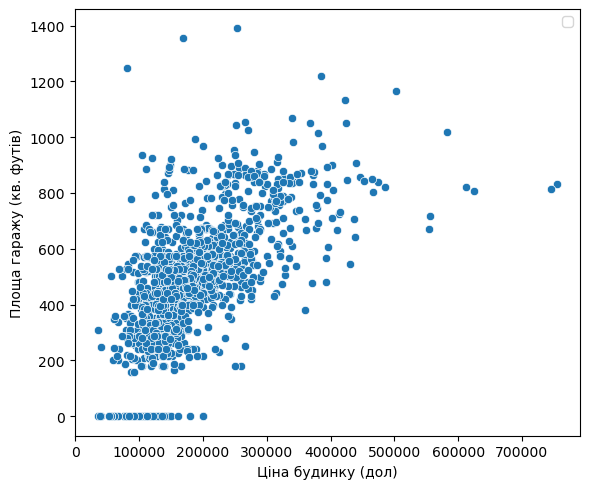

In [451]:
plt.figure(figsize = (6,5))

b1, b0 = np.polyfit(clean_data["sale_price"], clean_data["GarageArea"], deg = 1)
print(clean_data[["sale_price", 'GarageArea']].corr())
print(clean_data[["sale_price", 'GarageArea']].corr(method = "spearman"))
sns.scatterplot(x = clean_data["sale_price"], y = clean_data["GarageArea"])

plt.tight_layout()
plt.legend()
plt.ylabel("Площа гаражу (кв. футів)")
plt.xlabel("Ціна будинку (дол)")
plt.show()

Проаналізуємо кореляцію між ціною та площею підвалу

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


             sale_price  TotalBsmtSF
sale_price     1.000000     0.642032
TotalBsmtSF    0.642032     1.000000
             sale_price  TotalBsmtSF
sale_price     1.000000     0.598114
TotalBsmtSF    0.598114     1.000000


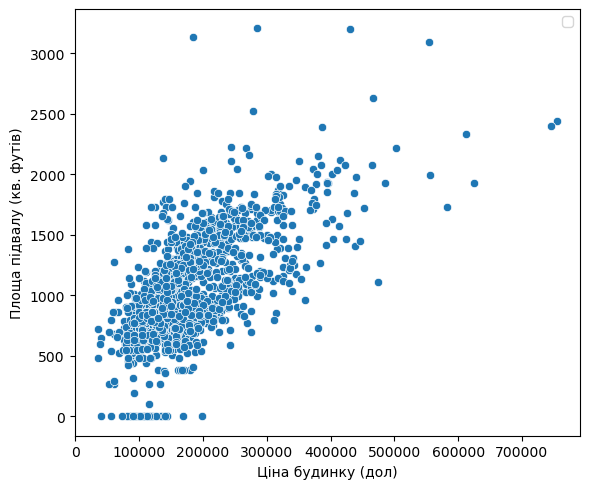

In [452]:
plt.figure(figsize = (6,5))

b1, b0 = np.polyfit(clean_data["sale_price"], clean_data["TotalBsmtSF"], deg = 1)
print(clean_data[["sale_price", 'TotalBsmtSF']].corr())
print(clean_data[["sale_price", 'TotalBsmtSF']].corr(method = "spearman"))
sns.scatterplot(x = clean_data["sale_price"], y = clean_data["TotalBsmtSF"])

plt.tight_layout()
plt.legend()
plt.ylabel("Площа підвалу (кв. футів)")
plt.xlabel("Ціна будинку (дол)")
plt.show()

Проаналізуємо кореляцію між ціною та площею відкритої веранди

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


             sale_price  OpenPorchSF
sale_price     1.000000     0.321848
OpenPorchSF    0.321848     1.000000
             sale_price  OpenPorchSF
sale_price     1.000000     0.478526
OpenPorchSF    0.478526     1.000000


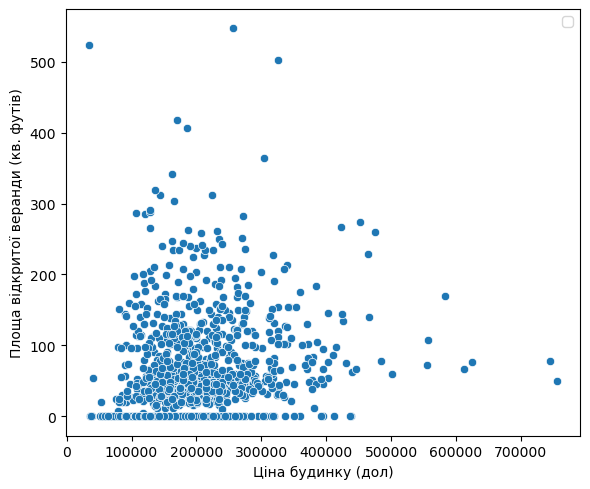

In [453]:
plt.figure(figsize = (6,5))

b1, b0 = np.polyfit(clean_data["sale_price"], clean_data["OpenPorchSF"], deg = 1)
print(clean_data[["sale_price", 'OpenPorchSF']].corr())
print(clean_data[["sale_price", 'OpenPorchSF']].corr(method = "spearman"))
sns.scatterplot(x = clean_data["sale_price"], y = clean_data["OpenPorchSF"])

plt.tight_layout()
plt.legend()
plt.ylabel("Площа відкритої веранди (кв. футів)")
plt.xlabel("Ціна будинку (дол)")
plt.show()

Використаємо кореляцію Пірсона, Спірмена та Кендала щоб порівняти кореляцію ціни з площею території, площею гаражу, площею підвалу та площею відкритої веранди. Подамо дані у таблиці.

In [454]:
correlation = data[['sale_price', 'LotArea', 'GarageArea', 'TotalBsmtSF', 'OpenPorchSF']].corr(method='pearson')
print(correlation)

             sale_price   LotArea  GarageArea  TotalBsmtSF  OpenPorchSF
sale_price     1.000000  0.263843    0.623431     0.613581     0.315856
LotArea        0.263843  1.000000    0.180403     0.260833     0.084774
GarageArea     0.623431  0.180403    1.000000     0.486665     0.241435
TotalBsmtSF    0.613581  0.260833    0.486665     1.000000     0.247264
OpenPorchSF    0.315856  0.084774    0.241435     0.247264     1.000000


In [455]:
correlation = data[['sale_price', 'LotArea', 'GarageArea', 'TotalBsmtSF', 'OpenPorchSF']].corr(method='spearman')
print(correlation)

             sale_price   LotArea  GarageArea  TotalBsmtSF  OpenPorchSF
sale_price     1.000000  0.456461    0.649379     0.602725     0.477561
LotArea        0.456461  1.000000    0.367153     0.366197     0.176965
GarageArea     0.649379  0.367153    1.000000     0.486685     0.338430
TotalBsmtSF    0.602725  0.366197    0.486685     1.000000     0.270321
OpenPorchSF    0.477561  0.176965    0.338430     0.270321     1.000000


In [456]:
correlation = data[['sale_price', 'LotArea', 'GarageArea', 'TotalBsmtSF', 'OpenPorchSF']].corr(method='kendall')
print(correlation)

             sale_price   LotArea  GarageArea  TotalBsmtSF  OpenPorchSF
sale_price     1.000000  0.314174    0.478146     0.435018     0.350161
LotArea        0.314174  1.000000    0.247904     0.252669     0.126485
GarageArea     0.478146  0.247904    1.000000     0.338118     0.247814
TotalBsmtSF    0.435018  0.252669    0.338118     1.000000     0.194711
OpenPorchSF    0.350161  0.126485    0.247814     0.194711     1.000000


Використаємо кореляцію Спірмена, щоб порівняти кореляцію ціни з площею території, площею гаражу, площею підвалу та площею відкритої веранди. Дані подамо у вигляді теплової карти.

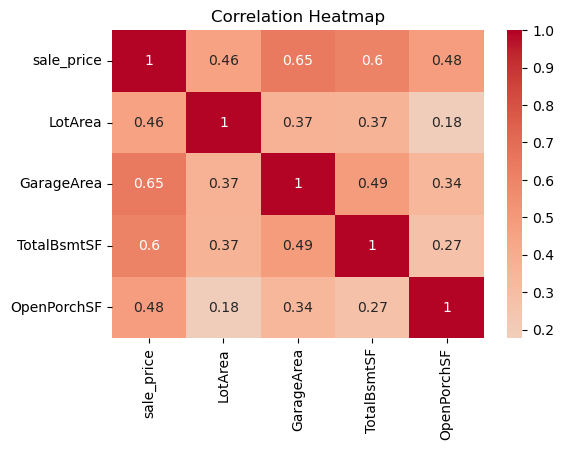

In [457]:
selected_columns = ['sale_price', 'LotArea', 'GarageArea', 'TotalBsmtSF', 'OpenPorchSF']
correlation = data[selected_columns].corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Можна зробити висновок, що найсильніша кореляція між ціною будинку та площею гаражу. Дослідимо цю кореляцію детальніше методом Спірмена, Пірсона та Кендала.

Pearson =  0.6234314389183617
Spearman =  0.6493785338868229
Kendall =  0.4781464855826087


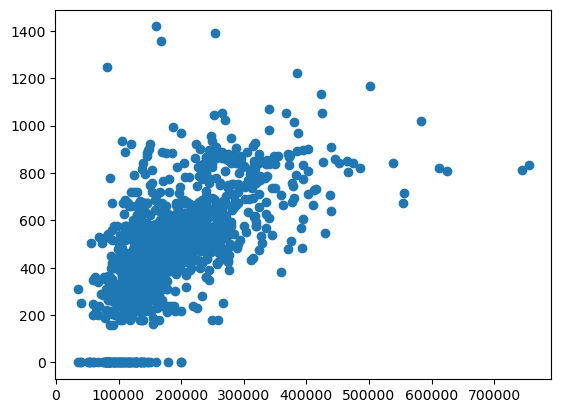

In [458]:
print("Pearson = ", st.pearsonr(data.sale_price, data.GarageArea).statistic)
print("Spearman = ", st.spearmanr(data.sale_price, data.GarageArea).statistic)
print("Kendall = ", st. kendalltau(data.sale_price, data.GarageArea).statistic)
plt.scatter(data.sale_price, data.GarageArea) 
plt.show()

Найперший висновок, який ми можемо зробити стосовно нашого дослідження кореляції між ціною будинку та кількома показниками - у нас позитивна кореляція. Це означає, що наприклад, чим більша площа гаражу, тим вища ціна на будинок. Чим більша площа прибудинкової території тим вища ціна будинку. Це ж праавило працює для рівня ціни в залежності від площі підвалу та відкритої веранди.

З усіх наших кореляцій, найсильніша спостерігається між ціною на будинок та площею гаражу. Відповідно, порахувавши кореляцію для ціни будинку та площі гаражу трьома способами, ми бачимо, що найсильніше кореляція проявляється, коли ми використовуємо метод Спірмена. Це нам говорить про монотоність даних, тобто наша ціна зростає зі збільшенням площі інших показників. Також, у нашому випадку краще використовувати метод Спірмена, так як у наших даних є невелика кількість викидів. Даний метод більш стійкий до викидів.  

# Завдання 3

Виберіть будь-яку дискретну колонку (наприклад BldgType) та виберіть спосіб аналізу зв’язку між обраною дискретною колонкою та SalePrice (візуалізація чи таблиця). Опишіть результати:

a. Як відрізняється ціна залежно від категорії?

b. Можливо в одній категорії розкид ціни більший ніж в іншій?

c. Чи впливає категорія на ціну?

d. Інші ваші ідеї та спостереження...

In [459]:
data.groupby("BldgType").sale_price.mean()

BldgType
1Fam      185763.807377
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
Name: sale_price, dtype: float64

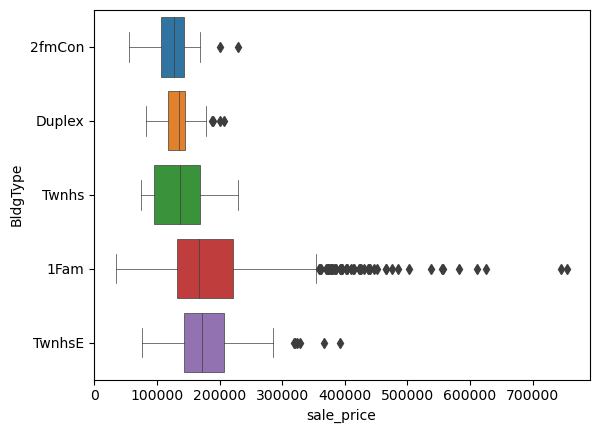

                   mean           std
BldgType                             
2fmCon    128432.258065  35458.545158
Duplex    133541.076923  27833.249197
Twnhs     135911.627907  41013.222080
TwnhsE    181959.342105  60626.108918
1Fam      185763.807377  82648.502922


In [460]:
order = data.groupby("BldgType").sale_price.median().sort_values().index
sns.boxplot(data, y = "BldgType", x = "sale_price", linewidth=0.5, order=order)
plt.show()

print(data.groupby("BldgType").sale_price.agg(["mean", "std"]).sort_values("mean"))

Ми бачимо, що найвища середня ціна, а також найбільший розмах середньої ціни буде для TwnhsE та 1Fam будинку. За нижчу ціну можна купити будинки типу 2fmCon, Duplex та Twnhs. Цікаве спостереження, для типу будинку 1Fam ціни будуть дуже відрізнятися. Такий тип будинку можна купити за близько 50000 доларів, а можна і за 350000 доларів чи навіть більше. Найменший розкид цін на будинки типу Duplex, найнижча ціна буде орієнтовно 80000 доларів, найвища ціна 180000 доларів. Проте є кілька аутлайнерів, які сягають до 220000 доларів.

# Завдання 4

Перевіримо чи SalePrice має нормальний розподіл.

a. Перевіримо чи працює правило 3 стандартних відхилень на наших даних
(правило 3 сигм, 68-95-99). Порахуйте 99% інтервал припускаючи, що дані мають нормальний розподіл (від середнього відніміть та додайте 3 стандартні відхилення). Також порахуйте реальні 99% інтервали використовуючи квантилі. Порівняйте два інтервали: чи схожі вони і що це може означати?

b. Намалюйте густину нормального розподілу (здійсніть fit даних) та нормалізовану гістограму даних (або згладжену гістограму). Порівняйте візуально різницю між вашими даними та нормальним розподілом. Які висновки?

In [461]:
quantile_99 = data['sale_price'].quantile(0.99)
mean = data['sale_price'].mean()
std = data['sale_price'].std()
Sigma_3 = 3*std+mean

print(f'Quantile 99%: {round(quantile_99, 4)}')
print(f'mean: {round(mean, 4)}')
print(f'std: {round(std, 4)}')
print(f'Sigma_3: {Sigma_3}')
print("Skewness:", st.skew(data['sale_price']))
print("Kurtosis:", st.kurtosis(data['sale_price']))

Quantile 99%: 442567.01
mean: 180921.1959
std: 79442.5029
Sigma_3: 419248.70453907084
Skewness: 1.880940746034036
Kurtosis: 6.509812011089439


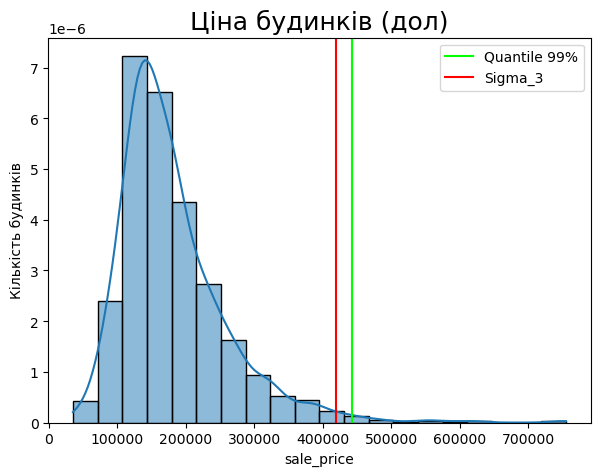

In [462]:
f,ax = plt.subplots(1,1, figsize = (7,5))

sns.histplot(data["sale_price"],ax = ax, bins = 20, kde = True, stat = 'density')
ax.set_ylabel("Кількість будинків")
ax.axvline(quantile_99, label = "Quantile 99%", color = "lime")
ax.axvline(Sigma_3, label = "Sigma_3", color = "r")
ax.set_title("Ціна будинків (дол)", fontsize = 18)

plt.legend()
plt.show()

In [463]:
Sigma_3 - quantile_99

-23318.305460929696

In [464]:
data['sale_price'].quantile(0.9855)

421802.3390000012

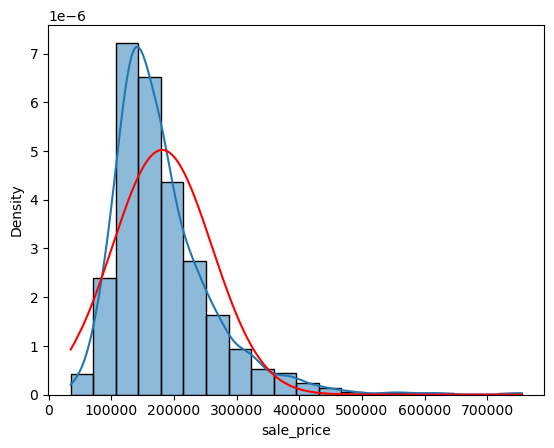

In [465]:
m, s = st.norm.fit(data["sale_price"])
density_values = st.norm.pdf(sorted(data["sale_price"]), loc = m, scale = s)

sns.histplot(data["sale_price"], bins = 20, kde = True, stat = 'density')
plt.plot(sorted(data["sale_price"]), density_values, c = "r")
plt.show()

Перше, що вказує на те, що у нас не нормальний розподіл це коефіцієнт асиметрії (Skewness), який є більшим від 0, тобто правий хвіст буде тяжчий. Коефіцієнт куртозису (Kurtosis) достатньо високий, що також вказує на тижкі хвости та гостріший пік в порівнянні з нормальним розподілом.

Порахувавши 99% інтервал, ми бачимо, що правило 3 сигм не працює, так як різниця становить 23318. Тому, можемо зробити висновок, що розподіл наюлижений до нормального, але все ж він не є нормальним.

Наступним кроком, за допомогою згладженої гістограми, ми візуалізували різницю між нормальним рорзподілом та нашим розподілом. Як бачимо, наша гістограма має гостру вершину та тяжкий правий хвіст. Вершина нормального розподілу знаходиться в іншій точці та має плавніший пік.

# Завдання 5

В розрізі дискретної колонки, яку ви вибрали у Завданні 3, порахуйте 99% інтервали для середньої ціни SalePrice. Тобто, у вас має вийти для кожної можливої категорії інший інтервал. Опишіть результати.

a. Чи перетинаються інтервали? Якщо так, то різниця між групами може бути несуттєвою.

b. Чому для деяких категорій інтервал ширший, а для інших - вужчий?

In [495]:
def ci_plot(dataset, category):
    data_category = dataset[dataset["BldgType"] == category]["sale_price"]

    plt.hist(data_category)
    plt.axvline(np.percentile(data_category, 0.5), c = "r", ls = "--", label = "CI for data")
    plt.axvline(np.percentile(data_category, 99.5), c = "r", ls = "--")
    print("99% CI: ", np.percentile(data_category, 0.5), np.percentile(data_category, 99.5))

    i1, i2 = st.norm.interval(0.99, loc = data_category.mean(), scale = data_category.std()/np.sqrt(len(data_category)))
    plt.axvline(i1, c = "orange", ls = "--", label = "CI for mean")
    plt.axvline(i2, c = "orange", ls = "--")
    print("99% CI for mean: ", i1, i2)
    print(data_category.mean(), data_category.shape[0])
    plt.legend()
    plt.show()

99% CI:  52737.5 553384.9999999995
99% CI for mean:  179668.82919263898 191858.78556145937
185763.80737704918 1220


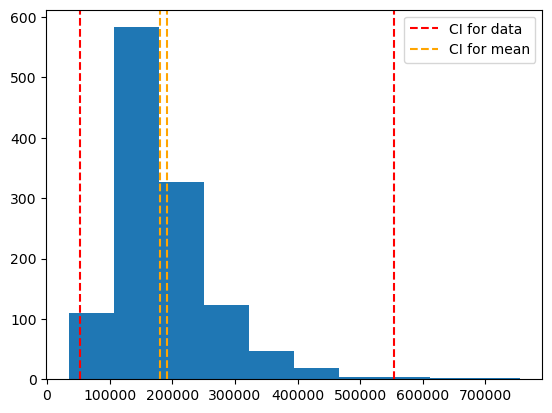

In [496]:
ci_plot(data, "1Fam")

99% CI:  58750.0 224607.50000000003
99% CI for mean:  112027.9791246114 144836.53700442088
128432.25806451614 31


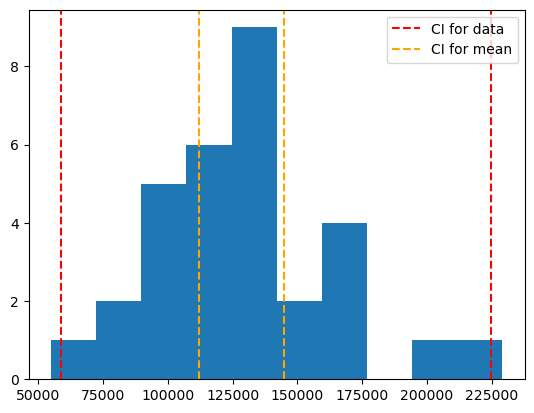

In [497]:
ci_plot(data, "2fmCon")

99% CI:  83402.5 204693.49999999997
99% CI for mean:  123598.94971187443 143483.20413427945
133541.07692307694 52


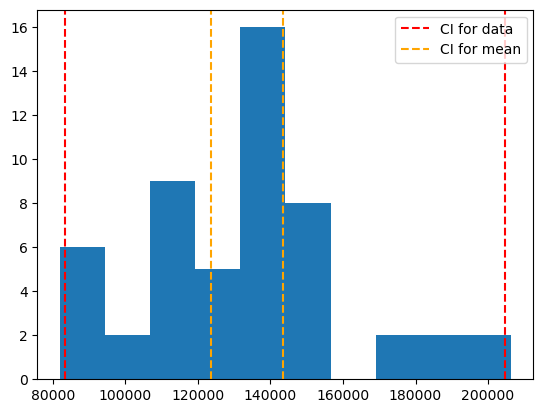

In [498]:
ci_plot(data, "Duplex")

99% CI:  76260.0 225694.99999999997
99% CI for mean:  119801.21240326055 152022.04341069292
135911.62790697673 43


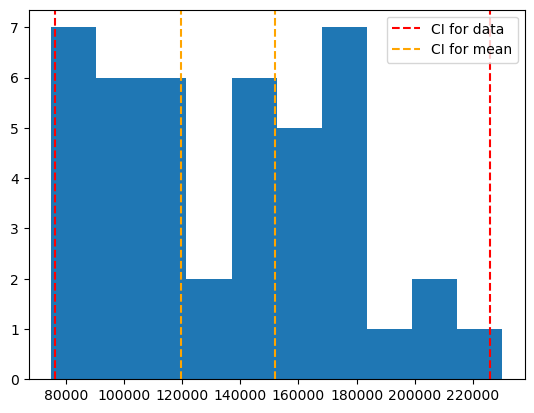

In [499]:
ci_plot(data, "Twnhs")

99% CI:  78042.5 378258.61000000004
99% CI for mean:  167333.3831841179 196585.3010264084
181959.34210526315 114


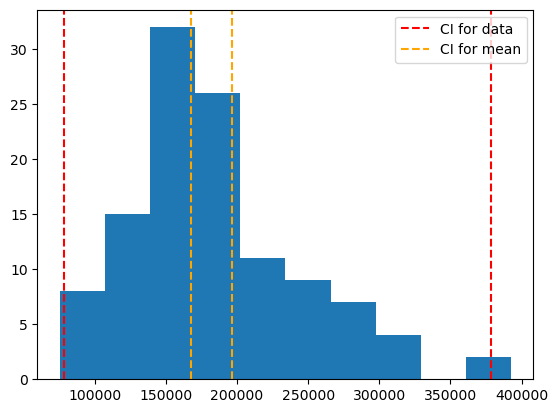

In [500]:
ci_plot(data, "TwnhsE")

Проаналізувавши інтервали довіри для середньої ціни по кожній категорії будинку, можемо стверджувати, що з ймовірністю 99% інтервал середньої ціни буде:

- 179668 доларів та 191858 доларів для 1Fam
- 112027 доларів та 144836 доларів для 2fmCon
- 123598 доларів та 143483 доларів для Duplex
- 119801 доларів та 152022 доларів для Twnhs
- 167333 доларів та 196585 доларів для TwnhsE

На наших гістограмах видно, що деякі інтервали перетинаються, а саме 1Fam та TwnhsE; 2fmCon, Duplex та Twnhs. 

Можна зауважити, що деякі інтервали вужчі, а деякі ширші. Це залежить від кількості даних. Наприклад, для 1Fam інтервал буде найвужчий, так як у нас 1220 даних, для 2fmCon інтервал буде найширший, оскільки у нас лише 31 даних.